<a href="https://colab.research.google.com/github/DwijapriyaSarma/myRepo/blob/main/handwrittn_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
#print('Tensorflow version:', tf.__version__)
#print('Keras version:', tf.keras.__version__)

Python version: 3.10.12


In [6]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [7]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

In [8]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [10]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [11]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


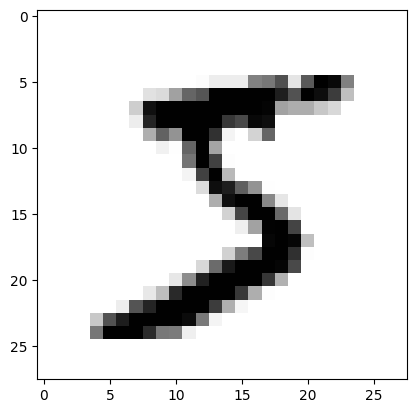

In [12]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

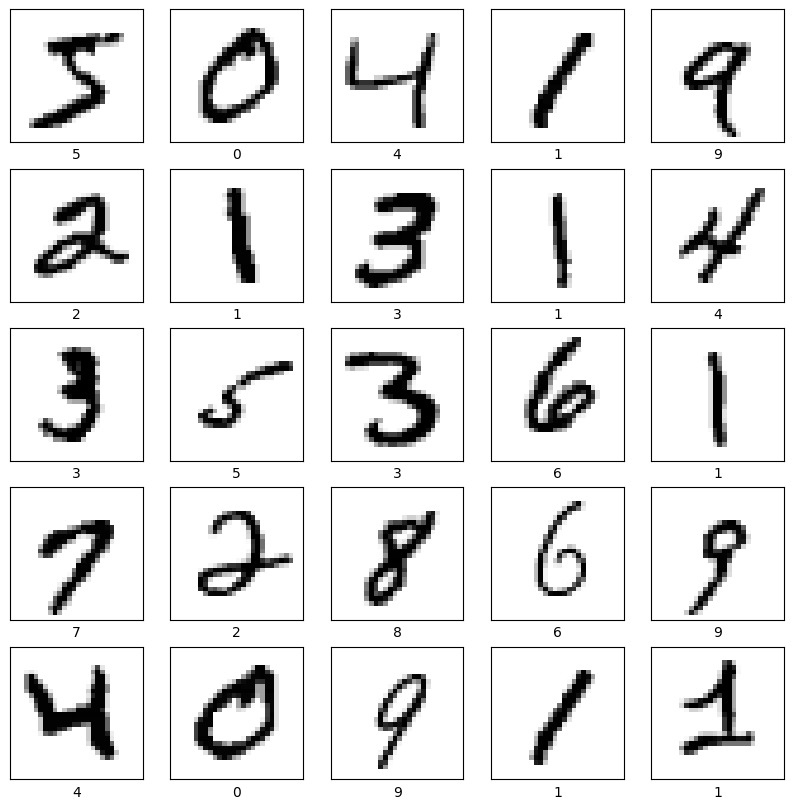

In [13]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [14]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [15]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [16]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [17]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [18]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

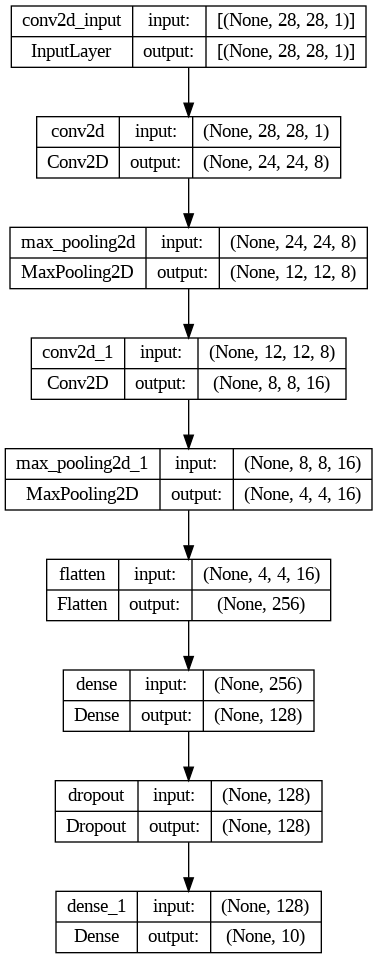

In [20]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [21]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [22]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1946 - accuracy: 0.9407 - val_loss: 0.0561 - val_accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0709 - accuracy: 0.9776 - val_loss: 0.0494 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0515 - accuracy: 0.9834 - val_loss: 0.0406 - val_accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0424 - accuracy: 0.9865 - val_loss: 0.0338 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0323 - val_accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0329 - val_accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.0390 -

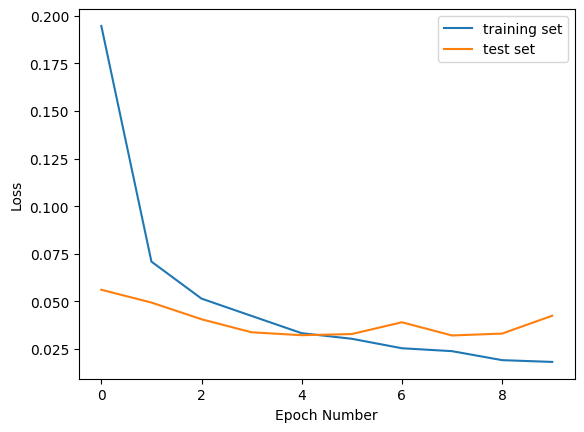

In [23]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

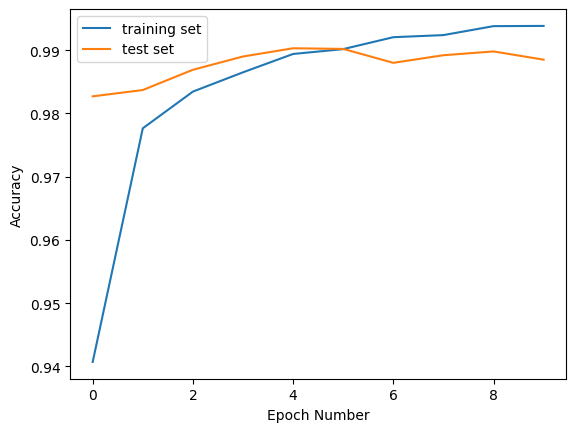

In [24]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [25]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0161 - accuracy: 0.9946


In [26]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.016059955582022667
Training accuracy:  0.9945666790008545


In [27]:
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0425 - accuracy: 0.9885


In [28]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.04247318580746651
Validation accuracy:  0.9884999990463257


In [29]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
loaded_model = tf.keras.models.load_model(model_name)

In [31]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 [==============================] - 2s 5ms/step


In [32]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [33]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.772223e-16,5.952528e-10,1.718353e-11,6.312823e-14,1.874880e-13,4.290099e-16,1.344213e-18,9.999999e-01,6.020081e-12,8.716267e-12
1,4.284589e-15,1.210107e-13,9.999999e-01,9.345041e-19,2.119784e-19,7.770416e-22,5.311735e-14,5.784901e-18,7.519906e-18,1.364141e-21
2,4.602272e-10,9.999992e-01,8.272536e-11,1.567236e-14,1.323035e-09,1.697884e-10,2.065395e-09,2.503347e-07,4.310506e-07,1.179792e-10
3,9.999998e-01,1.645401e-14,8.084575e-15,1.758176e-16,1.699805e-15,1.498148e-12,7.182975e-08,3.583045e-14,4.548452e-12,6.071950e-12
4,1.532739e-13,6.784395e-11,6.095169e-12,1.256378e-16,9.999998e-01,2.905652e-15,7.343618e-11,4.015604e-08,5.972667e-14,9.009761e-08
...,...,...,...,...,...,...,...,...,...,...
9995,2.472752e-20,3.876077e-12,9.999999e-01,3.145237e-15,5.368512e-20,1.346192e-21,1.979485e-18,2.092123e-09,3.034279e-15,5.617477e-24
9996,1.170687e-11,1.363705e-07,6.782881e-11,9.998968e-01,3.001110e-14,1.030019e-04,1.668389e-10,1.037176e-10,3.669695e-10,3.751923e-09
9997,8.188061e-21,1.649718e-12,2.104549e-17,6.135824e-22,9.999999e-01,6.365375e-20,4.608238e-18,1.719709e-10,4.750787e-13,3.665801e-12
9998,3.308173e-12,6.275428e-15,8.821539e-20,4.398142e-12,3.583641e-18,9.999985e-01,1.589309e-08,9.208741e-21,1.381276e-06,9.022067e-18


In [34]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [35]:
print(predictions[0])

7


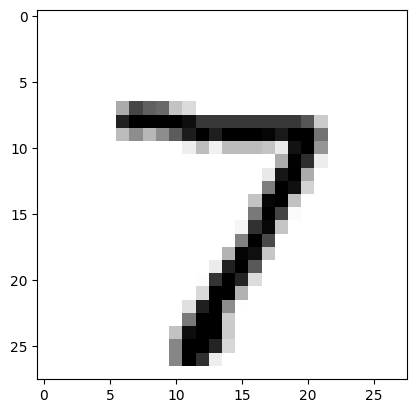

In [36]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

<ipython-input-37-2454e0a38738>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


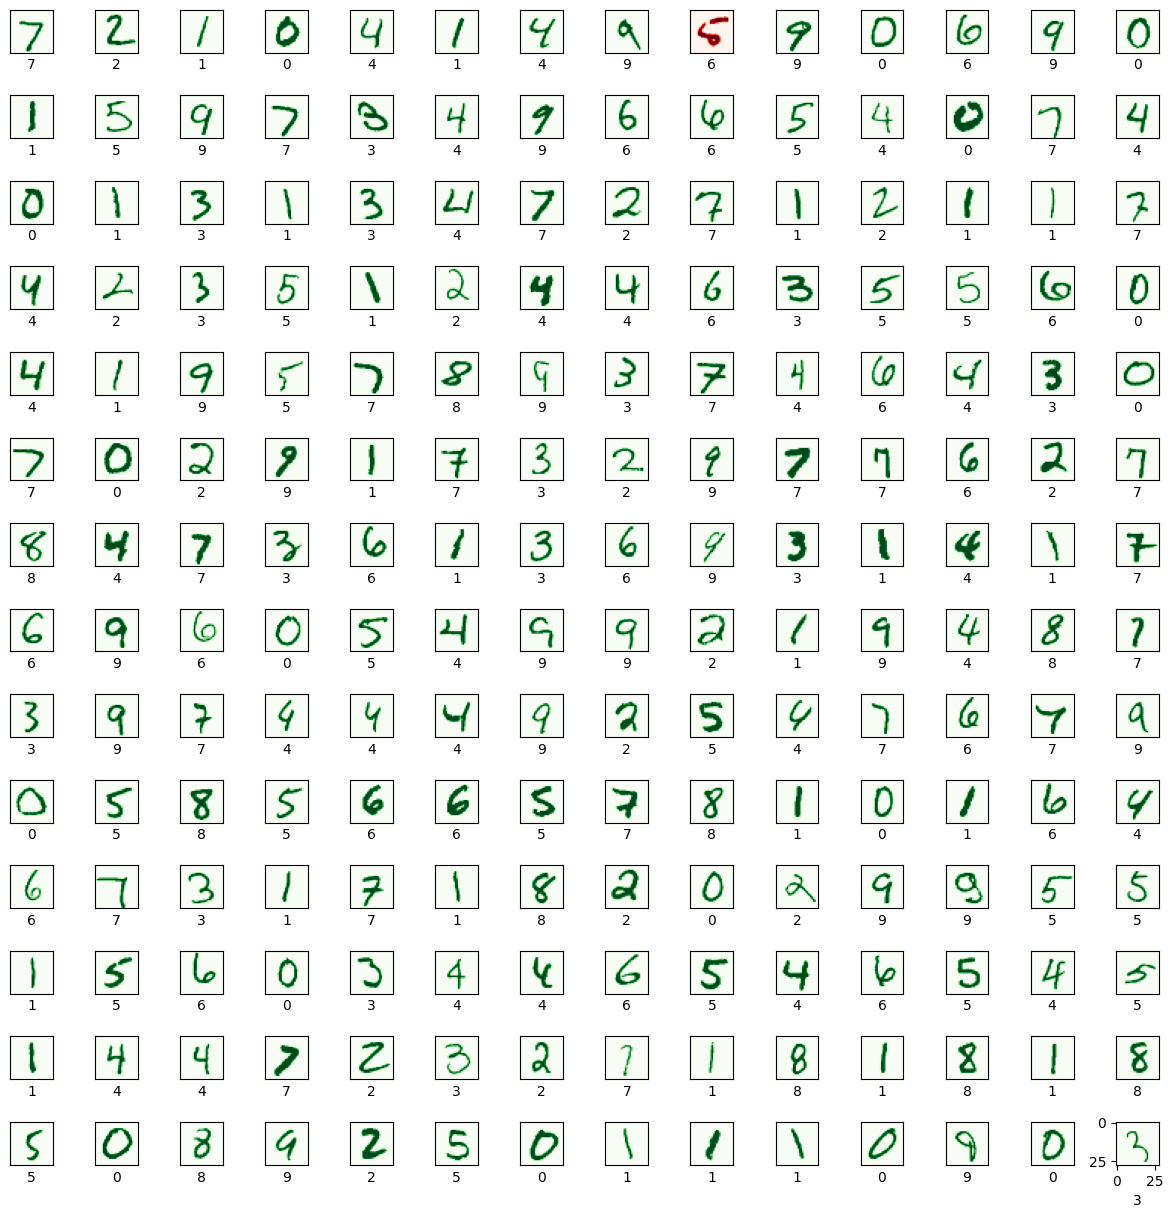

In [37]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

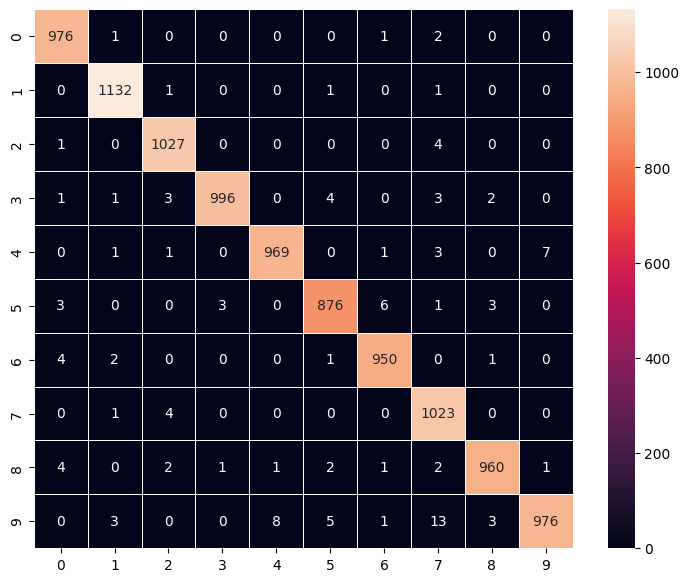

In [38]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()